<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/nse_pe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [42]:
data= pd.read_csv("https://raw.githubusercontent.com/anirbanghoshsbi/data/main/data_fundamental.csv")

In [43]:
data.set_index('Date',inplace=True)
data['mov50']= data['Div Yield'].rolling(window=100).mean()

In [44]:
data=data.tail(800)

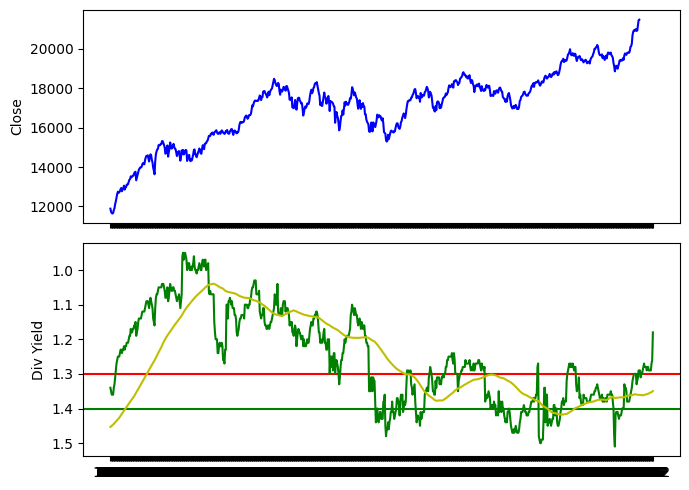

In [45]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
axs[1].axhline(y=1.4,color='g');
axs[1].axhline(y=1.3,color='r');
# Plot 'Close'
axs[0].plot(data['Close'], color='b')
axs[0].set_ylabel('Close')

# Plot 'Div Yield'
axs[1].plot( data['Div Yield'],  color='g')
axs[1].set_ylabel('Div Yield')
axs[1].plot(data['mov50'],color='y')
axs[1].invert_yaxis()
# Format date on x-axis to show only month and year
date_format = mdates.DateFormatter('%Y')
axs[1].xaxis.set_major_formatter(date_format)

# Display the plot
plt.tight_layout()
plt.show()

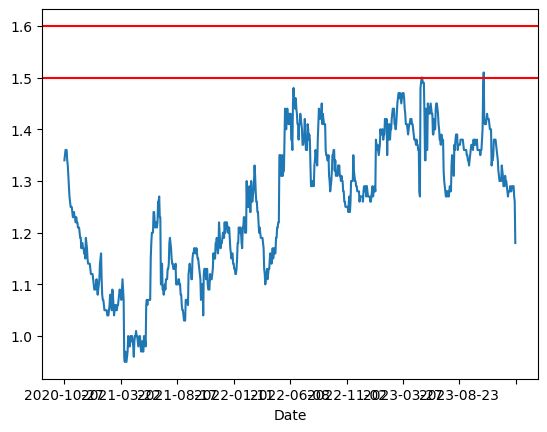

In [46]:
data['Div Yield'].plot()
plt.axhline(y=1.5,color='r');
plt.axhline(y=1.6,color='r');
